In [11]:
# Fungsi untuk menghitung derajat keanggotaan (membership degree
def membership(value, fuzzy_set):
  
    a, b, c = fuzzy_set
    if value <= a or value >= c:
        return 0.0
    elif a <= value < b:
        return (value - a) / (b - a)
    elif b <= value <= c:
        return (c - value) / (c - b)
    else:
        return 0.0  # Nilai default jika tidak memenuhi kondisi


In [12]:
# Fungsi untuk melakukan inferensi fuzzy
def inference(suhu, kelembapan):

    # Himpunan fuzzy untuk suhu
    suhu_dingin = membership(suhu, [16, 16, 23])
    suhu_normal = membership(suhu, [20, 23, 26])
    suhu_panas = membership(suhu, [23, 30, 30])

    # Himpunan fuzzy untuk kelembapan
    kelembapan_rendah = membership(kelembapan, [30, 30, 50])
    kelembapan_sedang = membership(kelembapan, [40, 55, 70])
    kelembapan_tinggi = membership(kelembapan, [60, 80, 80])

    # Inferensi fuzzy berdasarkan rule
    rules = [
        (min(suhu_dingin, kelembapan_rendah), 'lambat'),
        (min(suhu_dingin, kelembapan_sedang), 'lambat'),
        (min(suhu_dingin, kelembapan_tinggi), 'sedang'),

        (min(suhu_normal, kelembapan_rendah), 'lambat'),
        (min(suhu_normal, kelembapan_sedang), 'sedang'),
        (min(suhu_normal, kelembapan_tinggi), 'cepat'),

        (min(suhu_panas, kelembapan_rendah), 'sedang'),
        (min(suhu_panas, kelembapan_sedang), 'cepat'),
        (min(suhu_panas, kelembapan_tinggi), 'cepat'),
    ]

    # Menghitung output fuzzy
    output = {'lambat': 0.0, 'sedang': 0.0, 'cepat': 0.0}
    for rule_strength, label in rules:
        output[label] = max(output[label], rule_strength)

    return output


In [13]:
# Fungsi defuzzifikasi menggunakan metode rata-rata berbobot (weighted average)
def defuzzify(output):
    
    weights = {'lambat': 25, 'sedang': 50, 'cepat': 75}  # Bobot untuk tiap label
    numerator = sum(output[label] * weights[label] for label in output)
    denominator = sum(output[label] for label in output)

    if denominator == 0:
        return 0.0

    return numerator / denominator


In [14]:
# Contoh input nilai suhu dan kelembapan
suhu_input = 27  # Nilai suhu dalam derajat Celsius
kelembapan_input = 65  # Nilai kelembapan dalam persen


In [15]:
# Proses fuzzy inference
fuzzy_output = inference(suhu_input, kelembapan_input)

# Defuzzifikasi untuk mendapatkan nilai akhir
kecepatan_kipas = defuzzify(fuzzy_output)


In [16]:
# Tampilkan hasil
print(f"Derajat keanggotaan output fuzzy: {fuzzy_output}")
print(f"Kecepatan kipas yang direkomendasikan: {kecepatan_kipas:.2f}%")


Derajat keanggotaan output fuzzy: {'lambat': 0.0, 'sedang': 0.0, 'cepat': 0.3333333333333333}
Kecepatan kipas yang direkomendasikan: 75.00%


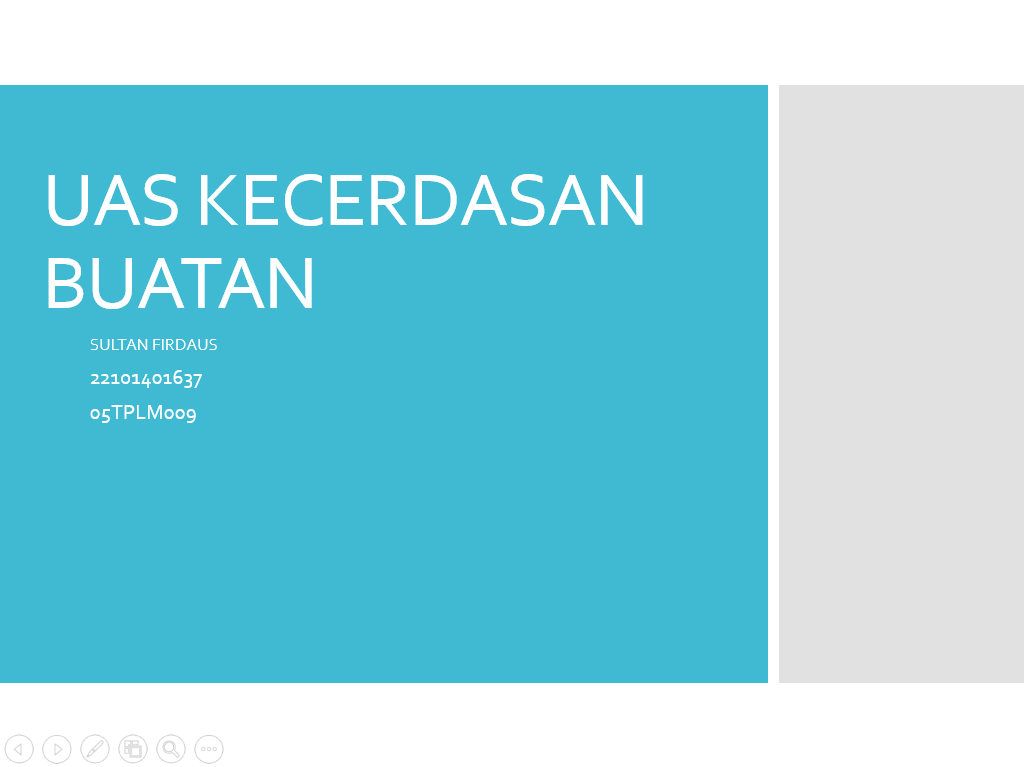

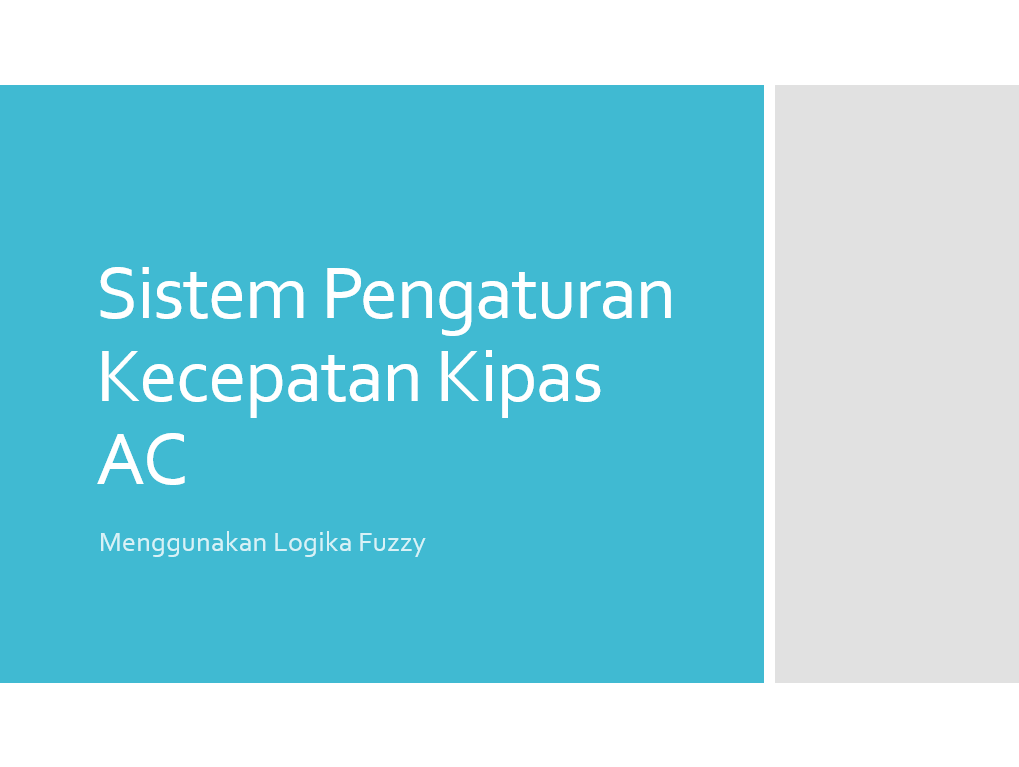

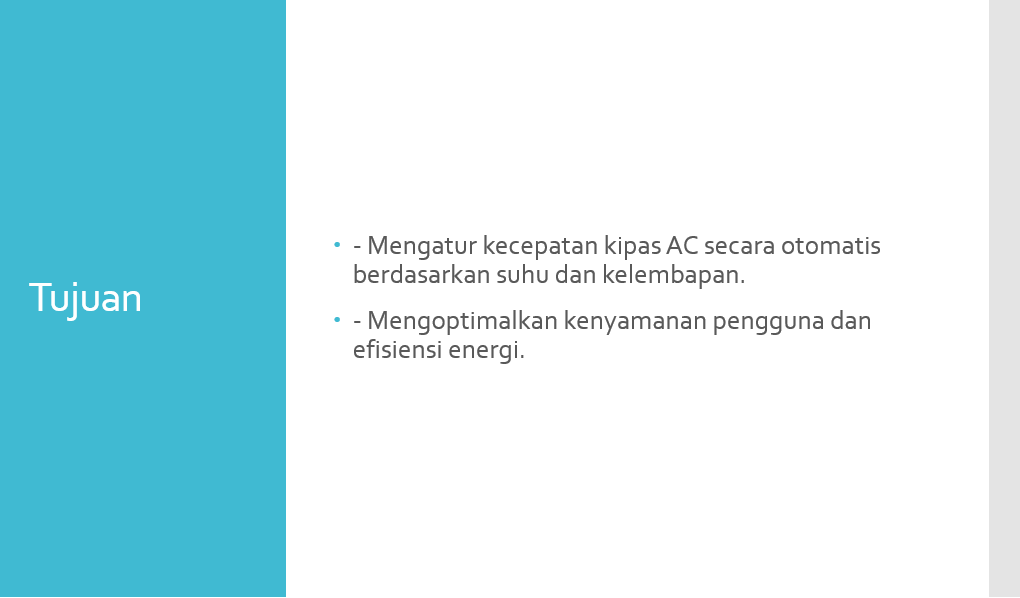

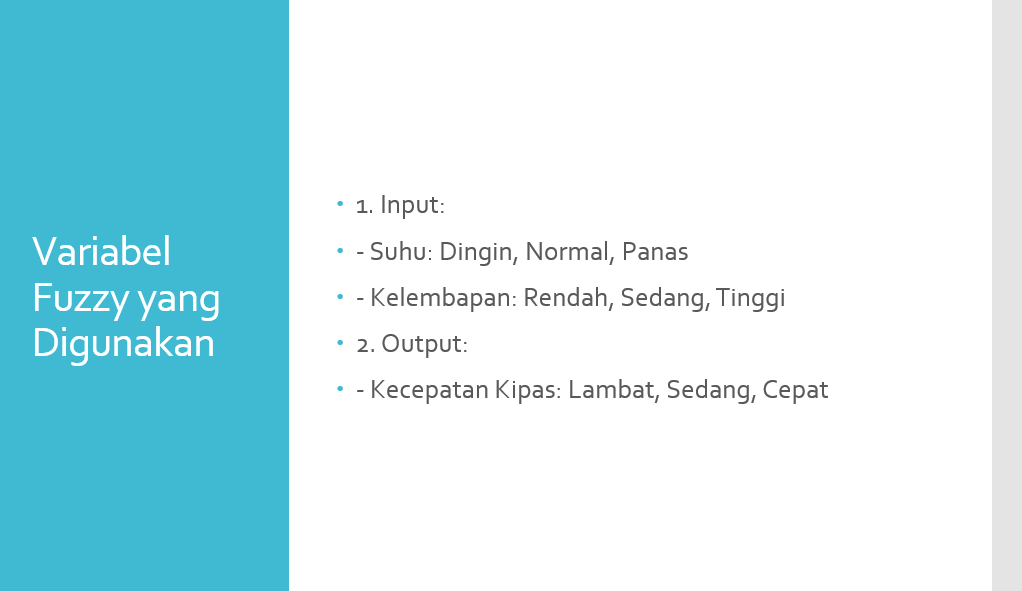

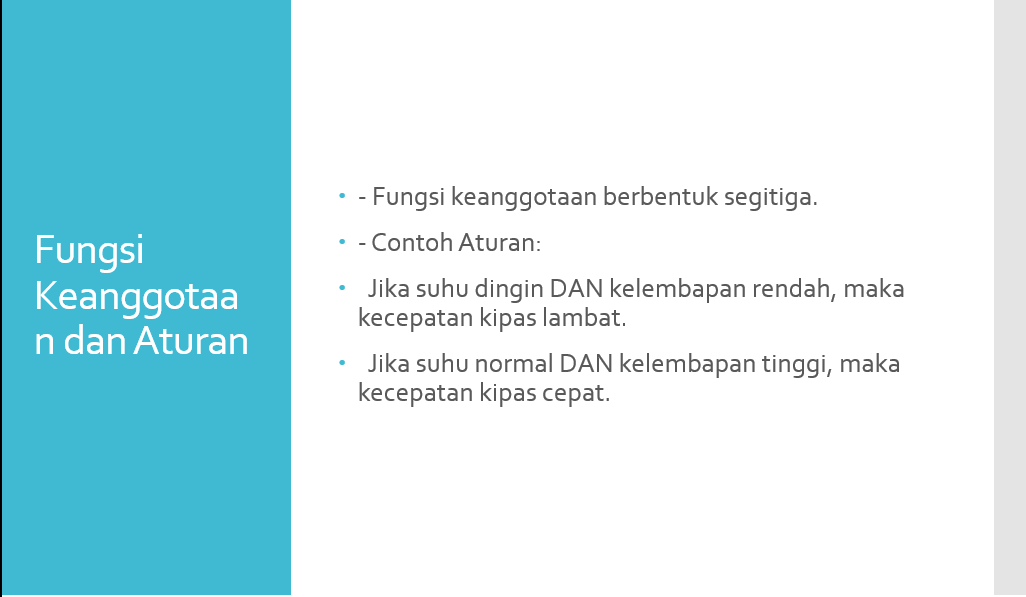

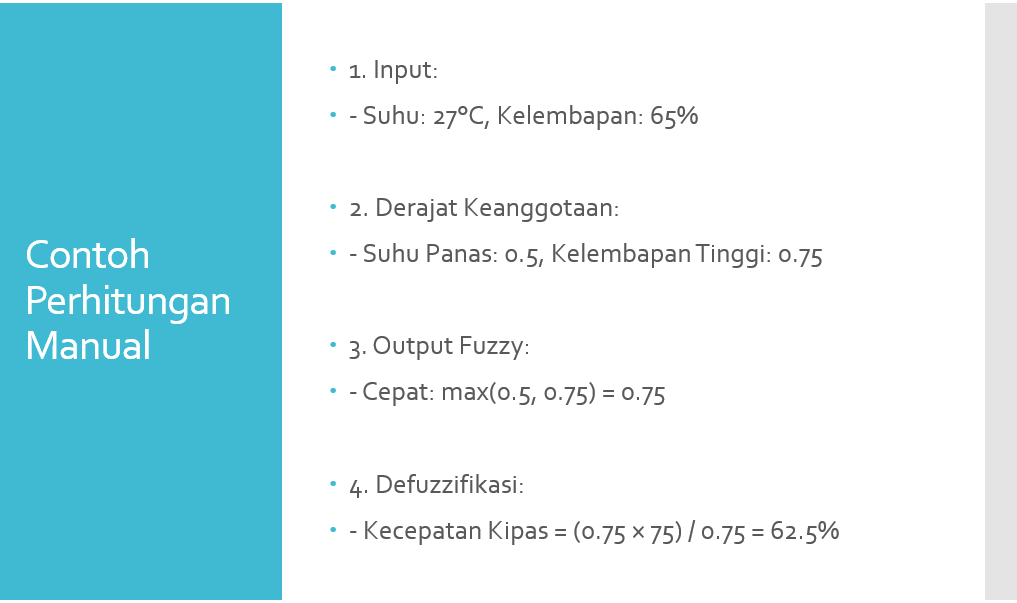

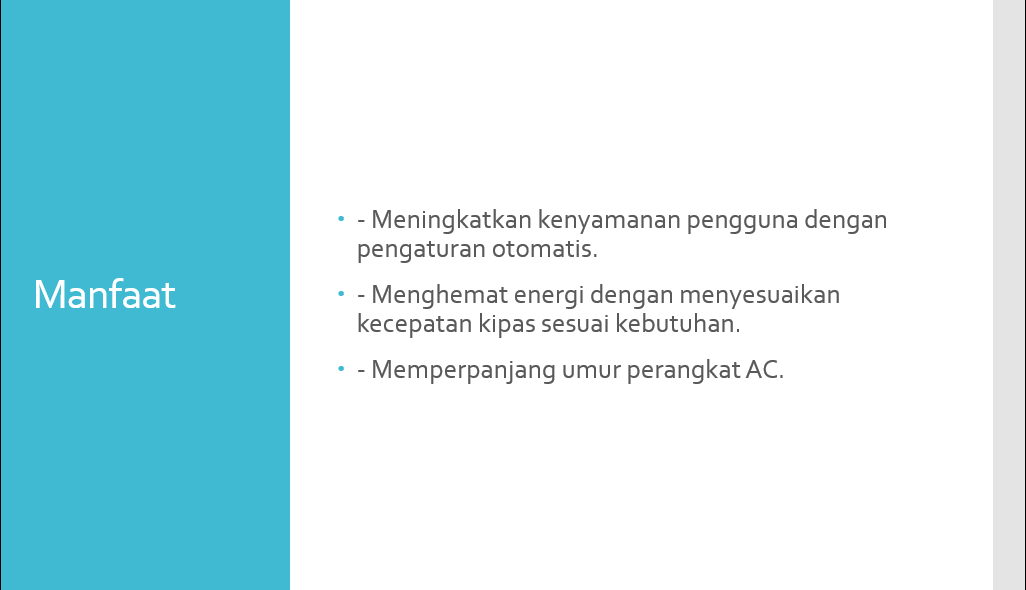

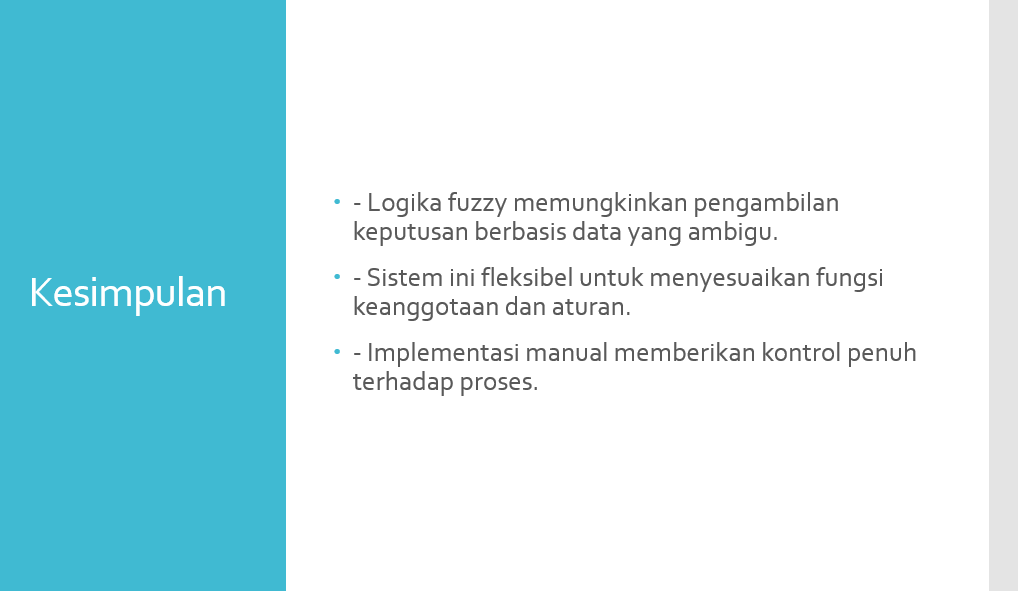